In [37]:
## ref: https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-10
## use keras (with theano backend) to solve classical MNIST problem, use two level of convolution2D, get 0.992 accuracy after 10 epochs

In [2]:
import numpy
import tensorflow
import keras
import numpy as np
np.random.seed(123)

Using Theano backend.
Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/site-packages/Theano-0.8.2-py2.7.egg/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [3]:
print numpy.__version__
print tensorflow.__version__
print keras.__version__
print np.__version__

1.12.1
1.0.1
1.2.2
1.12.1


## Import libraries and modules.

In [4]:
from keras.models import Sequential

In [5]:
from keras.layers import Dense, Dropout, Activation, Flatten

In [6]:
from keras.layers import Convolution2D, MaxPooling2D

In [7]:
from keras.utils import np_utils

## Load image data from MNIST.

In [8]:
from keras.datasets import mnist

In [9]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
print X_train.shape, y_train.shape

(60000, 28, 28) (60000,)


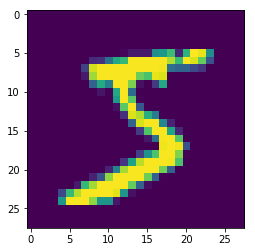

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Preprocess input data for Keras.

a full-color image with all 3 RGB channels will have a depth of 3.
Our MNIST images only have a depth of 1, but we must explicitly declare that.
In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [12]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [13]:
##(60000, 28, 28) => (60000, 1, 28, 28)

In [14]:
print X_train.shape, X_test.shape

(60000, 1, 28, 28) (10000, 1, 28, 28)


In [15]:
## to float and normalize data values to range[0,1]

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Preprocess class labels for Keras.

In [17]:
print y_train.shape

(60000,)


In [18]:
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


In [19]:
## one-hot encode

In [20]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:
print Y_train.shape

(60000, 10)


## Define model architecture.

In [28]:
model = Sequential()

In [29]:
## use theano backend here, when I tried tensorflow backend, have some problems.
## maybe try tensorflow later??
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,28,28)))
print model.output_shape
model.add(Convolution2D(32, 3, 3, activation='relu'))
print model.output_shape
model.add(MaxPooling2D(pool_size=(2,2)))
print model.output_shape
model.add(Dropout(0.25))
print model.output_shape

(None, 32, 26, 26)
(None, 32, 24, 24)
(None, 32, 12, 12)
(None, 32, 12, 12)


### meaning of first 3 parameters in Convolution2D:
They correspond to the number of convolution filters to use (32), the number of rows in each convolution kernel (3), and the number of columns in each convolution kernel (3), respectively.

## let's add a fully connected layer and then the output layer:

In [30]:
model.add(Flatten())
print model.output_shape
model.add(Dense(128, activation='relu'))
print model.output_shape
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print model.output_shape

(None, 4608)
(None, 128)
(None, 10)


### Comment:
For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

## Compile model.

we compile the model, we declare the loss function and the optimizer (SGD, Adam, etc.).

loss functions: https://keras.io/losses/

optimizers: https://keras.io/optimizers/

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Fit model on training data.

In [34]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 16s - loss: 0.2171 - acc: 0.9343    
Epoch 2/10
60000/60000 [==============================] - 16s - loss: 0.0894 - acc: 0.9735    
Epoch 3/10
60000/60000 [==============================] - 16s - loss: 0.0686 - acc: 0.9791    
Epoch 4/10
60000/60000 [==============================] - 16s - loss: 0.0571 - acc: 0.9830    
Epoch 5/10
60000/60000 [==============================] - 16s - loss: 0.0477 - acc: 0.9854    
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 0.0433 - acc: 0.9865    
Epoch 7/10
60000/60000 [==============================] - 16s - loss: 0.0381 - acc: 0.9883    
Epoch 8/10
60000/60000 [==============================] - 16s - loss: 0.0329 - acc: 0.9896    
Epoch 9/10
60000/60000 [==============================] - 16s - loss: 0.0301 - acc: 0.9907    
Epoch 10/10
60000/60000 [==============================] - 16s - loss: 0.0267 - acc: 0.9912    


You can also use a variety of callbacks to set early-stopping rules, save model weights along the way, or log the history of each training epoch:
https://keras.io/callbacks/

## Evaluate model on test data.

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [36]:
score

[0.033983120574241549, 0.99209999999999998]

## change backend: tensorflow or theano
$HOME/.keras/keras.json
like follows:
{
    "image_dim_ordering": "tf",
    "epsilon": 1e-07,
    "floatx": "float32",
    "backend": "theano"
}

change "backend" to either "theano" or "tensorflow", and Keras will use the new configuration next time you run any Keras code. and also maybe need to change "image_dim_ordering", either "tf" or "th".

In [ ]:
## can also do this inside of the notebook:

# from keras import backend as K
# K.set_image_dim_ordering('th')

### Useful links:
Here's a list of example implementations in Keras:
https://github.com/fchollet/keras/tree/master/examples

CS231n: Convolutional Neural Networks for Visual Recognition:
http://cs231n.stanford.edu/